In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("breast_cancer.csv")
data

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [3]:
data.shape

(569, 32)

In [5]:
data.info

<bound method DataFrame.info of      Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0             0        17.99         10.38          122.80     1001.0   
1             1        20.57         17.77          132.90     1326.0   
2             2        19.69         21.25          130.00     1203.0   
3             3        11.42         20.38           77.58      386.1   
4             4        20.29         14.34          135.10     1297.0   
..          ...          ...           ...             ...        ...   
564         564        21.56         22.39          142.00     1479.0   
565         565        20.13         28.25          131.20     1261.0   
566         566        16.60         28.08          108.30      858.1   
567         567        20.60         29.33          140.10     1265.0   
568         568         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0           

In [6]:
data.isnull().count

<bound method DataFrame.count of      Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0         False        False         False           False      False   
1         False        False         False           False      False   
2         False        False         False           False      False   
3         False        False         False           False      False   
4         False        False         False           False      False   
..          ...          ...           ...             ...        ...   
564       False        False         False           False      False   
565       False        False         False           False      False   
566       False        False         False           False      False   
567       False        False         False           False      False   
568       False        False         False           False      False   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0          

In [12]:
x=data.drop(columns='target',axis=1)

y=data['target']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2)

In [14]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [19]:
model=keras.Sequential([
    
    keras.layers.Flatten(),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")
])

In [22]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 36ms/step - loss: 132.6403 - accuracy: 0.6319 - val_loss: 73.6678 - val_accuracy: 0.6512
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 55.6721 - accuracy: 0.6292 - val_loss: 11.7794 - val_accuracy: 0.6512
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 10.4268 - accuracy: 0.5405 - val_loss: 11.1676 - val_accuracy: 0.4884
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 4.9923 - accuracy: 0.6554 - val_loss: 0.8221 - val_accuracy: 0.8605
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 2.4358 - accuracy: 0.8512 - val_loss: 0.6465 - val_accuracy: 0.9070
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 1.7516 - accuracy: 0.8642 - val_loss: 0.8472 - val_accuracy: 0.8837
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 1.1461 - accuracy: 0.8721 - val_loss: 0.1144 - val_accuracy: 0.9535
Epoch 8/10
1

In [24]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.transform(x_test)


In [25]:
model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 18ms/step - loss: 1.0940 - accuracy: 0.3420 - val_loss: 0.6661 - val_accuracy: 0.5814
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 0.7689 - accuracy: 0.5796 - val_loss: 0.4464 - val_accuracy: 0.8372
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5672 - accuracy: 0.7128 - val_loss: 0.3468 - val_accuracy: 0.9070
Epoch 4/10
12/12 [==============================] - 0s 9ms/step - loss: 0.4453 - accuracy: 0.7911 - val_loss: 0.2937 - val_accuracy: 0.9070
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 0.3732 - accuracy: 0.8433 - val_loss: 0.2620 - val_accuracy: 0.9070
Epoch 6/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3206 - accuracy: 0.8668 - val_loss: 0.2357 - val_accuracy: 0.9070
Epoch 7/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2829 - accuracy: 0.8956 - val_loss: 0.2142 - val_accuracy: 0.9302
Epoch 8/10
12/12 

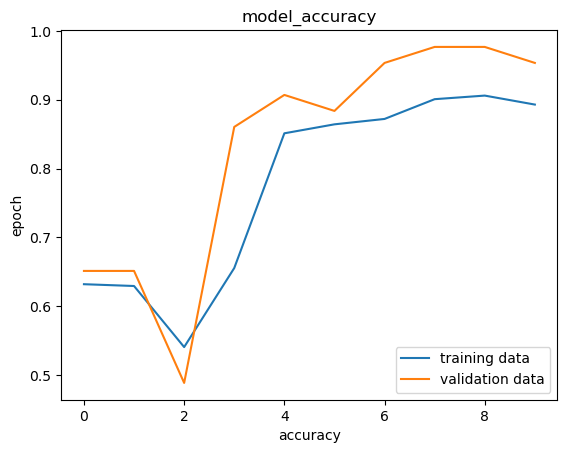

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model_accuracy")
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.legend(['training data','validation data'],loc="lower right")

In [30]:
loss,accuracy=model.evaluate(x_test_std,y_test)
print(accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.2000 - accuracy: 0.9301
0.9300699234008789


In [32]:
print(x_test_std.shape)
print(x_test_std[0])

(143, 31)
[ 1.49732347 -0.03666509 -1.41645777 -0.05078707 -0.15545204  2.04980453
 -0.10696563  0.18325798  0.48820736  0.65070292  0.26403126  0.53792273
  2.70757559  0.64056201  0.1205677   0.99601228  0.40529024  0.61374794
  2.93076545 -0.41076469  0.73798566 -0.32558433 -1.6916446  -0.36500811
 -0.38527628  0.33639712 -0.75251233 -0.55489156 -0.18011536 -1.22714244
 -0.6249352 ]


In [43]:
import numpy as np
input_data=(568,7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039
)
input_data_as_numpy=np.asarray(input_data)
input_data_rashaped=input_data_as_numpy.reshape(1,-1)
input_data_std=scalar.transform(input_data_rashaped)
prediction=model.predict(input_data_std)
prediction_labl=[np.argmax(prediction)]
if prediction_labl[0]==0:
    print("Its Malignent")
else:
    print("Its Benign")


1/1 [==============================] - 0s 47ms/step
Its Benign


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
